Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [95]:
import numpy as np

def linan(line1: str, line2: str):
  aab1 = [float(x) for x in line1.split()]
  aab2 = [float(x) for x in line2.split()]
  a = [aab[:2] for aab in [aab1, aab2]]
  b = [aab[2] for aab in [aab1, aab2]]
  xy = np.linalg.solve(
    a, b
  )

  return f'{xy[0]} {xy[1]}'

linan('1 2 10', '2 1 2')

'-2.0 6.0'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



Обратите внимание, что ожидается массив numpy

In [96]:
def decorate_matrix(n: int):
    def is_edge(i, j: int):
        return i==0 or i==n-1 or j==0 or j==n-1
    
    return [
        [1 if is_edge(i, j) else 0 for i in range(n)] for j in range(n)
    ]

decorate_matrix(5)

[[1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 1, 1, 1, 1]]

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

$f(x) = x^2 + 2ax + a^2 - b$


In [97]:
import math

a = 3
b = 4

f = lambda x: (x + a)**2 - b
def f_min(a):
    return -a

g = lambda x: abs(f(x))
def g_min(a, b):
    a, b, c = 1, 2*a, a**2 - b
    D = b**2 - 4*a*c
    if D < 0:
        return f_min()

    sqrt_D = math.sqrt(D)
    x1 = (-b + sqrt_D) / (2*a)
    x2 = (-b - sqrt_D) / (2*a)
    if x1 == x2:
        return x1

    return sorted([x1, x2])

print(f_min(a))
print(g_min(a, b))

-3
[-5.0, -1.0]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

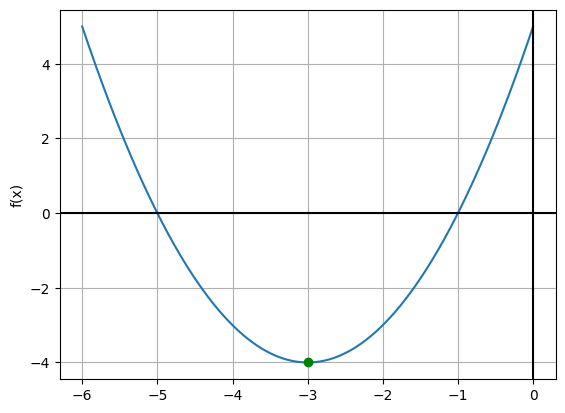

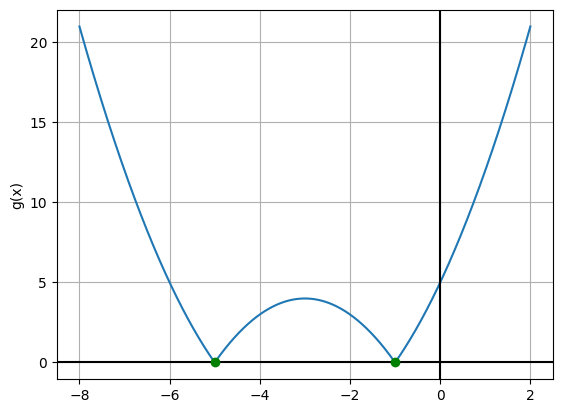

In [98]:
import matplotlib.pyplot as plt

def plot(f, dots=[], label='', x_min=-10, x_max=10):
    if dots:
        x_start = min(dots, key=lambda dot: dot[0])[0] - 3
        x_end = max(dots, key=lambda dot: dot[0])[0] + 3
    xs = np.linspace(x_start, x_end, 1_000)
    ys = [f(x) for x in xs]
    gs = [g(x) for x in xs]
    plt.plot(xs, ys)
    plt.ylabel(label)
    plt.grid()
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')    
    for dot in dots:
        plt.plot(*dot, 'go')
    plt.show()

plot(f, dots=[[f_min(a), f(f_min(a))]], label='f(x)')
plot(g, dots=[[x, g(x)] for x in g_min(a, b)], label='g(x)')

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [101]:
import itertools

C = lambda n, m: math.factorial(n) / ( math.factorial(n-m) * math.factorial(m) )
Bernuli = lambda n, k, p: C(n, k) * p**k * (1-p)**(n-k)

N = 1_000
n = 10
p = 0.5

print(f'1. {1 - Bernuli(N, 0, p**n)}')
print(f'2. {1 - Bernuli(N, 0, C(3, 1)*p**8*(1-p)**2)}')
print(f'3. {Bernuli(N, 3, p**n)}')

1. 0.623576201943276
2. 0.9468154551291703
3. 0.05842449273238755
